In [4]:
%matplotlib inline

import nltk
import string
from nltk.tokenize import word_tokenize
import pandas as pd

# Natural Language Processing

## News Category Dataset
Identify the type of news based on headlines and short descriptions

https://www.kaggle.com/rmisra/news-category-dataset

### Load the data

In [2]:
# only the TECH category was selected
df = pd.read_json('data/News_Category_Dataset_v2.json', lines=True)
df.head()

,authors,category,date,headline,link,short_description
0,Lorenzo Ligato,TECH,2015-08-04,#ILookLikeAnEngineer Destroys The Tech Nerd St...,https://www.huffingtonpost.com/entry/i-look-li...,Think you know what an engineer is supposed to...
1,Alexandra Ma,TECH,2015-08-11,#TotalHonestyTuesday Lets You Be Your True Sel...,https://www.huffingtonpost.com/entry/total-hon...,"Sometimes, you just need to lay it all out there."
2,Damon Beres,TECH,2015-07-16,'Angry Birds 2' Is Officially Coming This Summer,https://www.huffingtonpost.com/entry/angry-bir...,Ready thy thumbs!
3,Lorenzo Ligato,TECH,2015-08-14,'BeerBots' Can Fetch Booze For People Too Lazy...,https://www.huffingtonpost.com/entry/beerbots-...,They don't even require tips.
4,"Reuters, Reuters",TECH,2012-03-25,'Cash Mobs' Use Social Media To Splurge In Loc...,https://www.huffingtonpost.com/entry/cash-mobs...,"CLEVELAND, Ohio (Reuters) - Flash mobs have be..."


In [3]:
# concatenate the headline and the short description - corpus is the collection of text
df['headline_short_description'] = df['headline'] + ' - ' + df['short_description']
corpus = list(df['headline_short_description'].values)
news = corpus.copy()
news

['#ILookLikeAnEngineer Destroys The Tech Nerd Stereotype - Think you know what an engineer is supposed to look like? Think again.',
 '#TotalHonestyTuesday Lets You Be Your True Self On Instagram - Sometimes, you just need to lay it all out there.',
 "'Angry Birds 2' Is Officially Coming This Summer - Ready thy thumbs!",
 "'BeerBots' Can Fetch Booze For People Too Lazy To Get Up - They don't even require tips.",
 "'Cash Mobs' Use Social Media To Splurge In Locally Owned Stores - CLEVELAND, Ohio (Reuters) - Flash mobs have been blamed as a factor in looting during urban riots. But now a group of online",
 '\'Civic Eagle\' App Wants To Bring Americans Face To Face In Online Debate - With mobile-native "mini-video debates," everybody can join the conversation.',
 "'Clash Of Clans' Company Made An Absurd Amount Of Money Last Year - Mobile gaming company Supercell had a reported income of 871 million euros, nearly 10 times that of Nokia.",
 '\'Dear Santa\' Letter With Full Amazon Link Is So 

[nltk_data] Downloading package punkt to /home/bda/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[('-', 2130), (',', 2000), ('.', 1837), ('the', 1731), ('to', 1138), ('The', 944), ('of', 927), ("'s", 921), ('a', 877), ('and', 750), ('To', 515), ('in', 502), ('is', 473), (':', 434), ('Apple', 407), ('for', 389), ('that', 380), ('you', 367), ('In', 354), ("'", 323), ('Facebook', 311), ('on', 310), ('A', 296), ('``', 284), ('Of', 281), ("n't", 273), ('Is', 264), ('Google', 261), ('?', 260), ('it', 254)]


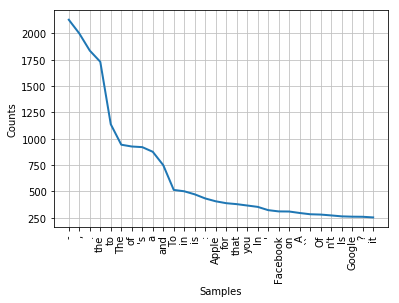

In [5]:
# get the list of most popular words
from nltk.probability import FreqDist
import itertools
nltk.download('punkt')
news_chart = news.copy()
for i in range(len(news_chart)):
    news_chart[i] = word_tokenize(news_chart[i])
# merge a list of lists
all_news = list(itertools.chain.from_iterable(news_chart))
# frequency distribution
fdist = FreqDist(all_news)
print(fdist.most_common(30))
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Lowercase, remove punctuation, spaces

In [6]:
for i in range(len(news)):
    # lowercase
    news[i] = str(news[i]).lower()
    # remove punctuation
    translator = str.maketrans('','',string.punctuation)
    news[i] = news[i].translate(translator)
    # remove spaces at the begenning and at the end
    news[i] = news[i].strip()
news

['ilooklikeanengineer destroys the tech nerd stereotype  think you know what an engineer is supposed to look like think again',
 'totalhonestytuesday lets you be your true self on instagram  sometimes you just need to lay it all out there',
 'angry birds 2 is officially coming this summer  ready thy thumbs',
 'beerbots can fetch booze for people too lazy to get up  they dont even require tips',
 'cash mobs use social media to splurge in locally owned stores  cleveland ohio reuters  flash mobs have been blamed as a factor in looting during urban riots but now a group of online',
 'civic eagle app wants to bring americans face to face in online debate  with mobilenative minivideo debates everybody can join the conversation',
 'clash of clans company made an absurd amount of money last year  mobile gaming company supercell had a reported income of 871 million euros nearly 10 times that of nokia',
 'dear santa letter with full amazon link is so 2013 it hurts  in a dear santa letter thats t

### Tokenize

In [7]:
# nltk.download('punkt')
for i in range(len(news)):
    news[i] = word_tokenize(news[i])
news

[['ilooklikeanengineer',
  'destroys',
  'the',
  'tech',
  'nerd',
  'stereotype',
  'think',
  'you',
  'know',
  'what',
  'an',
  'engineer',
  'is',
  'supposed',
  'to',
  'look',
  'like',
  'think',
  'again'],
 ['totalhonestytuesday',
  'lets',
  'you',
  'be',
  'your',
  'true',
  'self',
  'on',
  'instagram',
  'sometimes',
  'you',
  'just',
  'need',
  'to',
  'lay',
  'it',
  'all',
  'out',
  'there'],
 ['angry',
  'birds',
  '2',
  'is',
  'officially',
  'coming',
  'this',
  'summer',
  'ready',
  'thy',
  'thumbs'],
 ['beerbots',
  'can',
  'fetch',
  'booze',
  'for',
  'people',
  'too',
  'lazy',
  'to',
  'get',
  'up',
  'they',
  'dont',
  'even',
  'require',
  'tips'],
 ['cash',
  'mobs',
  'use',
  'social',
  'media',
  'to',
  'splurge',
  'in',
  'locally',
  'owned',
  'stores',
  'cleveland',
  'ohio',
  'reuters',
  'flash',
  'mobs',
  'have',
  'been',
  'blamed',
  'as',
  'a',
  'factor',
  'in',
  'looting',
  'during',
  'urban',
  'riots',
  '

### Stopwords

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# for a more complete list of stopwords and in other languages: https://www.ranks.nl/stopwords
# pritn the stop_words
stop_words = set(stopwords.words('english'))
print(stop_words)

for i in range(len(news)):
    news[i] = [word for word in news[i] if not word in stop_words]
news

[nltk_data] Downloading package stopwords to /home/bda/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'above', 'll', 'here', 'won', 'such', 'has', 'again', 'o', 'his', "aren't", 'hasn', 'other', 'ours', 'by', 'through', 'once', 'no', 'a', 'does', "wouldn't", 'don', 'this', "mightn't", 'their', 'yourselves', 'off', 'all', 'he', 'and', 'wasn', 'needn', "you've", 'your', 'me', 'doing', 'under', 'between', 'shouldn', 'did', 'we', 'have', 'himself', 'yours', 'as', 'so', 'who', 'until', 'because', 'them', 'up', 'y', 'the', 'own', "couldn't", 'herself', 'were', 'each', 'more', 'was', 'in', 'only', 'is', 'him', 'there', 'most', 'at', 's', "won't", 'wouldn', "hasn't", 'these', 'to', 'that', 'down', 'ma', 'below', 'few', "haven't", 'i', 'haven', 'do', 'you', 'any', 'our', 'couldn', "you're", 'too', 't', 'further', 'shan', "hadn't", 'yourself', 'while', 'am', 'mustn', 'hers', "shan't", "wasn't", 'now', 'doesn', 'ain', 'after', 'those', 'how', 'during', 'themselves', "that'll", 'are'

[['ilooklikeanengineer',
  'destroys',
  'tech',
  'nerd',
  'stereotype',
  'think',
  'know',
  'engineer',
  'supposed',
  'look',
  'like',
  'think'],
 ['totalhonestytuesday',
  'lets',
  'true',
  'self',
  'instagram',
  'sometimes',
  'need',
  'lay'],
 ['angry',
  'birds',
  '2',
  'officially',
  'coming',
  'summer',
  'ready',
  'thy',
  'thumbs'],
 ['beerbots',
  'fetch',
  'booze',
  'people',
  'lazy',
  'get',
  'dont',
  'even',
  'require',
  'tips'],
 ['cash',
  'mobs',
  'use',
  'social',
  'media',
  'splurge',
  'locally',
  'owned',
  'stores',
  'cleveland',
  'ohio',
  'reuters',
  'flash',
  'mobs',
  'blamed',
  'factor',
  'looting',
  'urban',
  'riots',
  'group',
  'online'],
 ['civic',
  'eagle',
  'app',
  'wants',
  'bring',
  'americans',
  'face',
  'face',
  'online',
  'debate',
  'mobilenative',
  'minivideo',
  'debates',
  'everybody',
  'join',
  'conversation'],
 ['clash',
  'clans',
  'company',
  'made',
  'absurd',
  'amount',
  'money',
 

### Frequency Distribution

[('apple', 358), ('new', 337), ('facebook', 280), ('google', 233), ('week', 222), ('iphone', 173), ('twitter', 136), ('tech', 135), ('one', 134), ('people', 127), ('youtube', 126), ('us', 125), ('could', 125), ('social', 124), ('internet', 119), ('videos', 119), ('get', 113), ('look', 110), ('watch', 108), ('company', 101), ('time', 98), ('data', 94), ('see', 91), ('online', 90), ('video', 90), ('world', 88), ('technology', 87), ('youre', 86), ('app', 84), ('dont', 83)]


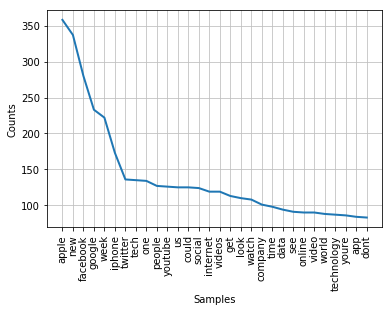

In [10]:
from nltk.probability import FreqDist
import itertools

# merge a list of lists
all_news = list(itertools.chain.from_iterable(news))

# Frequency distribution
fdist = FreqDist(all_news)
print(fdist.most_common(30))

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Stemming

In [11]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

for i in range(5):
    stemmed_words=[]
    for word in news[i]:
        stemmed_words.append(stemmer.stem(word))

    print('Original senstence:', news[i])
    print('Stemmed sentence:', stemmed_words)
    print('')

Original senstence: ['ilooklikeanengineer', 'destroys', 'tech', 'nerd', 'stereotype', 'think', 'know', 'engineer', 'supposed', 'look', 'like', 'think']
Stemmed sentence: ['ilooklikeanengin', 'destroy', 'tech', 'nerd', 'stereotyp', 'think', 'know', 'engin', 'suppos', 'look', 'like', 'think']

Original senstence: ['totalhonestytuesday', 'lets', 'true', 'self', 'instagram', 'sometimes', 'need', 'lay']
Stemmed sentence: ['totalhonestytuesday', 'let', 'true', 'self', 'instagram', 'sometim', 'need', 'lay']

Original senstence: ['angry', 'birds', '2', 'officially', 'coming', 'summer', 'ready', 'thy', 'thumbs']
Stemmed sentence: ['angri', 'bird', '2', 'offici', 'come', 'summer', 'readi', 'thi', 'thumb']

Original senstence: ['beerbots', 'fetch', 'booze', 'people', 'lazy', 'get', 'dont', 'even', 'require', 'tips']
Stemmed sentence: ['beerbot', 'fetch', 'booz', 'peopl', 'lazi', 'get', 'dont', 'even', 'requir', 'tip']

Original senstence: ['cash', 'mobs', 'use', 'social', 'media', 'splurge', 'loc

### Lemmatization

In [13]:
# Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatize = WordNetLemmatizer()

for i in range(5):
    lemmatized_words=[]
    for word in news[i]:
        lemmatized_words.append(wordnet_lemmatize.lemmatize(word))

    print('Original senstence:', news[i])
    print('Lemmatized sentence:', lemmatized_words)
    print('')

[nltk_data] Downloading package wordnet to /home/bda/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Original senstence: ['ilooklikeanengineer', 'destroys', 'tech', 'nerd', 'stereotype', 'think', 'know', 'engineer', 'supposed', 'look', 'like', 'think']
Lemmatized sentence: ['ilooklikeanengineer', 'destroys', 'tech', 'nerd', 'stereotype', 'think', 'know', 'engineer', 'supposed', 'look', 'like', 'think']

Original senstence: ['totalhonestytuesday', 'lets', 'true', 'self', 'instagram', 'sometimes', 'need', 'lay']
Lemmatized sentence: ['totalhonestytuesday', 'let', 'true', 'self', 'instagram', 'sometimes', 'need', 'lay']

Original senstence: ['angry', 'birds', '2', 'officially', 'coming', 'summer', 'ready', 'thy', 'thumbs']
Lemmatized sentence: ['angry', 'bird', '2', 'officially', 'coming', 'summer', 'ready', 'thy', 'thumb']

Original senstence: ['beerbots', 'fetch', 'booze', 'people', 'lazy', 'get', 'dont', 'even', 'require', 'tips']
Lemmatized sentence: ['beerbots', 'fetch', 'b

In [14]:
# Stemming x Lemmatization

stemmer = PorterStemmer()
wordnet_lemmatize = WordNetLemmatizer()

sentence = 'cities wolves children'
tokens=nltk.word_tokenize(sentence)

stemmed_words=[]
lemmatized_words = []
for word in tokens:
    stemmed_words.append(stemmer.stem(word))
    lemmatized_words.append(wordnet_lemmatize.lemmatize(word))

print('Original senstence:', tokens)
print('Stemmed sentence:', stemmed_words)
print('Lemmatized sentence:', lemmatized_words)
print('')

Original senstence: ['cities', 'wolves', 'children']
Stemmed sentence: ['citi', 'wolv', 'children']
Lemmatized sentence: ['city', 'wolf', 'child']



In [15]:
# POS Tagging

nltk.download('averaged_perceptron_tagger')

# Alphabetical list of part-of-speech tags
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

sentence = corpus[0]
tokens=nltk.word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bda/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
['#', 'ILookLikeAnEngineer', 'Destroys', 'The', 'Tech', 'Nerd', 'Stereotype', '-', 'Think', 'you', 'know', 'what', 'an', 'engineer', 'is', 'supposed', 'to', 'look', 'like', '?', 'Think', 'again', '.']
[('#', '#'), ('ILookLikeAnEngineer', 'NNP'), ('Destroys', 'NNP'), ('The', 'DT'), ('Tech', 'NNP'), ('Nerd', 'NNP'), ('Stereotype', 'NNP'), ('-', ':'), ('Think', 'VBP'), ('you', 'PRP'), ('know', 'VBP'), ('what', 'WP'), ('an', 'DT'), ('engineer', 'NN'), ('is', 'VBZ'), ('supposed', 'VBN'), ('to', 'TO'), ('look', 'VB'), ('like', 'IN'), ('?', '.'), ('Think', 'NNP'), ('again', 'RB'), ('.', '.')]


In [16]:
#Named-entity recognition

nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk import word_tokenize, pos_tag, ne_chunk

sentence = 'Prime Minister Justin Trudeau campaigns in Montreal riding of Outremont ahead of byelection'
print(ne_chunk(pos_tag(word_tokenize(sentence))))

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/bda/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /home/bda/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
(S
  Prime/NNP
  Minister/NNP
  (PERSON Justin/NNP Trudeau/NNP)
  campaigns/NNS
  in/IN
  (GPE Montreal/NNP)
  riding/NN
  of/IN
  (GPE Outremont/NNP)
  ahead/RB
  of/IN
  byelection/NN)


In [17]:
# Synonyms 

from nltk.corpus import wordnet

for ss in wordnet.synsets('small'):
    print('Name:', ss.name())
    print('Synonyms:', ss.lemma_names())
    print('Definition:', ss.definition())
    print('Examples:', ss.examples()) 
    print()

Name: small.n.01
Synonyms: ['small']
Definition: the slender part of the back
Examples: []

Name: small.n.02
Synonyms: ['small']
Definition: a garment size for a small person
Examples: []

Name: small.a.01
Synonyms: ['small', 'little']
Definition: limited or below average in number or quantity or magnitude or extent
Examples: ['a little dining room', 'a little house', 'a small car', 'a little (or small) group']

Name: minor.s.10
Synonyms: ['minor', 'modest', 'small', 'small-scale', 'pocket-size', 'pocket-sized']
Definition: limited in size or scope
Examples: ['a small business', 'a newspaper with a modest circulation', 'small-scale plans', 'a pocket-size country']

Name: little.s.03
Synonyms: ['little', 'small']
Definition: (of children and animals) young, immature
Examples: ['what a big little boy you are', 'small children']

Name: small.s.04
Synonyms: ['small']
Definition: slight or limited; especially in degree or intensity or scope
Examples: ['a series of death struggles with small

# Sklearn - Feature Extraction

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
df_counts = pd.DataFrame(X.toarray())
df_counts.columns = vectorizer.get_feature_names()
df_count = df_counts.sum(axis=0).sort_values(ascending=False).reset_index()
df_count


,index,0
0,the,2684
1,to,1667
2,of,1213
3,and,945
4,in,866
5,is,708
6,for,608
7,you,602
8,on,496
9,that,480


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
df_counts = pd.DataFrame(X.toarray())
df_counts.columns = vectorizer.get_feature_names()
df_count = df_counts.sum(axis=0).sort_values(ascending=False).reset_index()
df_count


,index,0
0,the,125.465931
1,to,90.949650
2,of,74.998253
3,and,62.745197
4,in,61.383057
5,you,59.025224
6,is,57.097486
7,for,48.806896
8,apple,46.553423
9,it,43.683580


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase = True, strip_accents = 'ascii', stop_words = 'english', ngram_range = (1,2), min_df = 10)
X = vectorizer.fit_transform(corpus)
df_counts = pd.DataFrame(X.toarray())
df_counts.columns = vectorizer.get_feature_names()
df_count = df_counts.sum(axis=0).sort_values(ascending=False).reset_index()
df_count['rank'] = df_count[0].rank(axis=0, ascending=False)
df_count.columns = ['word', 'count', 'rank_count']
df_count


,word,count,rank_count
0,apple,414,1.0
1,new,337,2.0
2,facebook,312,3.0
3,google,272,4.0
4,week,249,5.0
5,iphone,178,6.0
6,twitter,155,7.0
7,tech,147,8.0
8,just,141,9.0
9,people,129,10.0


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase = True, strip_accents = 'ascii', stop_words = 'english', ngram_range = (1,2), min_df = 10)
X = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(X.toarray())
df_tfidf.columns = vectorizer.get_feature_names()
df_tfidf.sort_values('zuckerberg', ascending=False).head()
df_tfidf = df_tfidf.sum(axis=0).sort_values(ascending=False).reset_index()
df_tfidf['rank'] = df_tfidf[0].rank(axis=0, ascending=False)
df_tfidf.columns = ['word', 'tfidf', 'rank_tfidf']
df_tfidf


,word,tfidf,rank_tfidf
0,apple,78.796374,1.0
1,facebook,71.676948,2.0
2,new,68.779635,3.0
3,google,62.798943,4.0
4,iphone,44.399580,5.0
5,twitter,40.371911,6.0
6,week,39.395761,7.0
7,just,38.502812,8.0
8,tech,35.789522,9.0
9,internet,34.103331,10.0


In [22]:
df_compare = df_count.merge(df_tfidf, on='word', how='left')
df_compare['diff'] = abs(df_compare['rank_tfidf']-df_compare['rank_count'])
df_compare = df_compare[(df_compare['rank_tfidf']<50)&(df_compare['rank_count']<50)]
df_compare.sort_values('diff', ascending=False)

,word,count,rank_count,tfidf,rank_tfidf,diff
20,videos week,101,21.0,19.181450,42.0,21.0
19,youtube videos,103,20.0,19.484314,38.0,18.0
16,look,110,17.0,21.102696,31.0,14.0
44,microsoft,62,45.0,20.611479,33.0,12.0
45,know,61,46.5,19.864054,36.0,10.5
14,videos,119,15.0,22.778971,25.0,10.0
36,phone,69,37.0,21.624428,28.0,9.0
30,amazon,75,31.5,23.785118,23.0,8.5
38,use,66,39.5,20.939242,32.0,7.5
10,youtube,128,11.0,25.709791,18.0,7.0
